import necessary for calling external function

In [18]:
import networkx as nx
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

Create the graph, read the file and add edge and nodes 

In [3]:
graph = nx.Graph()
graph_edge_list=nx.Graph()

with open('fb-pages-tvshowEDGE.csv') as f:
    f.readline()
    for line in f:
        source, destination = line.strip().split(',') #tuple
        graph.add_edge(source,destination)
        
print('Number of nodes: {} - Number of links:{}'.format(graph.order(),graph.size()))

Number of nodes: 3892 - Number of links:17261


Read the nodes labels from file and relabel the graph nodes

In [4]:
labels = {}

df = pd.read_csv("fb-pages-tvshowNODES.csv")

df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

for index, row in df.iterrows():
    tmp = int(row["Id"])
    labels[str(tmp)] = str(row["name"])
    
graph = nx.relabel_nodes(graph, labels)

pos = nx.spring_layout(graph)
#nx.draw_networkx(graph,pos=pos)
 
    #test
#nx.draw_networkx_labels(graph, pos, label, font_size=16)
#nx.draw(graph, with_labels = True)
#nx.draw_networkx_nodes(graph, pos) 
#nx.draw_networkx_edges(graph, pos) 
#nx.draw_networkx_labels(graph, pos, labels, font_size=1)

Run some statistics over the network

In [5]:
graph_degree=list(dict(graph.degree()).values())

print("Mean degree: "+ str(np.mean(graph_degree)))
print("Median degree: " + str(np.median(graph_degree))) 
print("Standard Deviation: "+ str(np.std(graph_degree)))
print("Max degree value: " + str(np.max(graph_degree)))
print("Min degree value: " + str(np.min(graph_degree)))

Mean degree: 8.932435930623868
Median degree: 5.0
Standard Deviation: 12.658862276836015
Max degree value: 126
Min degree value: 1


A first simple degree analysis

In [6]:
def getKey(label):
    keys = list(labels.keys())
    vals = list(labels.values())
    key = keys[vals.index(label)]
    return key

print("Modern Family has degree " + str(graph.degree["Modern Family"]))
print("The Office has degree " + str(graph.degree["The Office"]))
print("Hell's Kitchen has degree " + str(graph.degree["Hell's Kitchen"]))
print("The Big Bang Theory has degree " + str(graph.degree["The Big Bang Theory"]))

Modern Family has degree 86
The Office has degree 45
Hell's Kitchen has degree 94
The Big Bang Theory has degree 36


# Degree analysis
Define some constant

In [7]:
max_element = 15

## Degree Centrality
This is based on the assumption that important nodes have many connections

In [8]:
centrality = nx.degree_centrality(graph)

sort_orders = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

degree_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1])
    degree_centr.append(i[0])

Home & Family 0.03262558259968928
Queen of the South 0.03262558259968928
So You Think You Can Dance 0.027964785085447953
MasterChef 0.027705851890212324
Glee 0.026929052304505437
New Girl 0.02641118591403418
Family Guy 0.02615225271879855
The Simpsons 0.02589331952356292
Dancing with the Stars 0.02589331952356292
Bones 0.025116519937856033
Brooklyn Nine-Nine 0.02459865354738477
Bob's Burgers 0.02459865354738477
Hell's Kitchen 0.024339720352149142
Sleepy Hollow 0.023045054375970996
Modern Family 0.02226825479026411


## Closeness Centrality
This is based on the assumption that important nodes are close to other nodes.

In [9]:
close_centrality = nx.closeness_centrality(graph) 

sort_orders = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)

close_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1])
    close_centr.append(i[0])

Queen of the South 0.26575832645196806
Home & Family 0.2640864332603939
Access 0.2594383984952304
The Tonight Show Starring Jimmy Fallon 0.2537617451869374
The Voice 0.2489043567929879
The List 0.2461440407903123
America's Got Talent 0.2456274247917064
The Insider 0.2449575034885196
The Biggest Loser 0.24326026706979087
Entourage 0.242268364594442
Parenthood 0.24125437281359322
Jay Leno 0.24074304949507544
Parks and Recreation 0.23992048207740574
New Girl 0.23951872984371123
Extra 0.23779323933255342


## Betweenness Centrality
It assumes that important nodes connect other nodes

In [10]:
bet_centrality = nx.betweenness_centrality(graph, normalized = True,  
                                              endpoints = False)

sort_orders = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)

between_centr = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1])
    between_centr.append(i[0])

Queen of the South 0.26575832645196806
Home & Family 0.2640864332603939
Access 0.2594383984952304
The Tonight Show Starring Jimmy Fallon 0.2537617451869374
The Voice 0.2489043567929879
The List 0.2461440407903123
America's Got Talent 0.2456274247917064
The Insider 0.2449575034885196
The Biggest Loser 0.24326026706979087
Entourage 0.242268364594442
Parenthood 0.24125437281359322
Jay Leno 0.24074304949507544
Parks and Recreation 0.23992048207740574
New Girl 0.23951872984371123
Extra 0.23779323933255342


## Page Rank
Page Rank Algorithm was developed by Google founders to measure the importance of webpages from the hyperlink network structure. Page Rank assigns a score of importance to each node. Important nodes are those with many inlinks from important pages.

In [11]:
pr = nx.pagerank(graph, alpha = 0.8)

sort_orders = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)

page_rank = []

count=0
for i in sort_orders:
    if count==max_element:
        break
    count=count+1
    print(i[0], i[1])
    page_rank.append(i[0])

Queen of the South 0.26575832645196806
Home & Family 0.2640864332603939
Access 0.2594383984952304
The Tonight Show Starring Jimmy Fallon 0.2537617451869374
The Voice 0.2489043567929879
The List 0.2461440407903123
America's Got Talent 0.2456274247917064
The Insider 0.2449575034885196
The Biggest Loser 0.24326026706979087
Entourage 0.242268364594442
Parenthood 0.24125437281359322
Jay Leno 0.24074304949507544
Parks and Recreation 0.23992048207740574
New Girl 0.23951872984371123
Extra 0.23779323933255342


### Here we can see the different result jointly

In [12]:
df = pd.DataFrame()
df["Degree Centrality"] = degree_centr
df["Closeness Centrality"] = close_centr
df["Betweenness Centrality"] = between_centr
df["Page Rank"] = page_rank
df

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Page Rank
0,Home & Family,Queen of the South,Queen of the South,Queen of the South
1,Queen of the South,Home & Family,Home & Family,Home & Family
2,So You Think You Can Dance,Access,Access,Access
3,MasterChef,The Tonight Show Starring Jimmy Fallon,The Tonight Show Starring Jimmy Fallon,The Tonight Show Starring Jimmy Fallon
4,Glee,The Voice,The Voice,The Voice
5,New Girl,The List,The List,The List
6,Family Guy,America's Got Talent,America's Got Talent,America's Got Talent
7,The Simpsons,The Insider,The Insider,The Insider
8,Dancing with the Stars,The Biggest Loser,The Biggest Loser,The Biggest Loser
9,Bones,Entourage,Entourage,Entourage


# Isolation and Connectivity

In [13]:
print(list(nx.isolates(graph)))

[]


In [14]:
print(nx.is_connected(graph))
print(nx.number_connected_components(graph))

True
1


# ECDF in linear e logscale

Text(0, 0.5, 'ECDF TV Show')

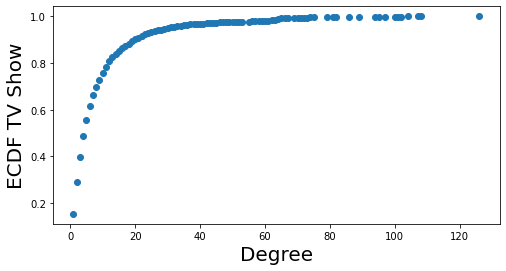

In [19]:
# ECDF linear scale
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

Text(0, 0.5, 'ECDF TV Show')

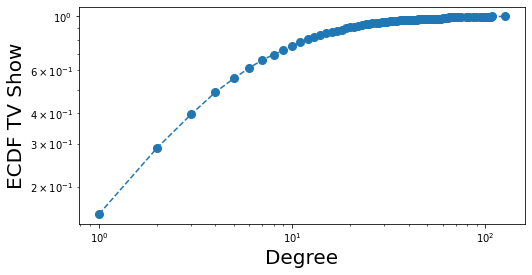

In [20]:
# ECDF loglog scale
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

Text(0, 0.5, 'ECDF TV Show')

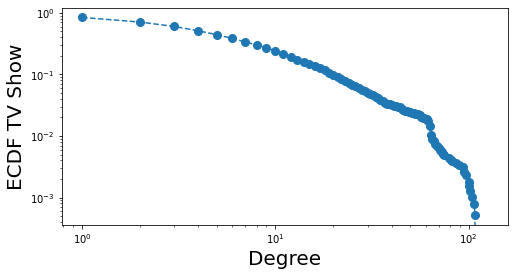

In [21]:
# ECCDF
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF TV Show', size = 20)

In [23]:
density = nx.density(graph)
print('Density: {}'.format(density))

Density: 0.0023129041767539792


In [24]:
p = density

random_graph = nx.fast_gnp_random_graph(graph.order(),p)

print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

random_degree = list(dict(random_graph.degree()).values())

Number of nodes: 3863
Number of links: 17299


Text(0, 0.5, 'ECCDF')

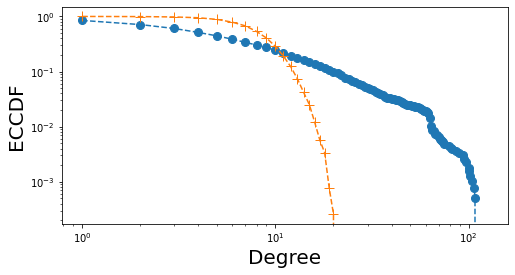

In [26]:
cdf = ECDF(graph_degree)
x = np.unique(graph_degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

# Hubs

In [28]:
percentile_99 = np.percentile(graph_degree,99)
print(percentile_99)

hub_nodi = [k for k,v in dict(graph.degree()).items() if v>= percentile_99]

print(len(hub_nodi))
print(list(hub_nodi))

65.0
40
['American Grit', 'Wayward Pines', 'MasterChef', 'The Grinder', 'FOX Teen Choice Awards', 'Rosewood', 'Scream Queens', 'New Girl', 'Gotham', 'Family Guy', 'Grandfathered', 'Empire', 'Second Chance', 'So You Think You Can Dance', 'The Simpsons', 'Glee', 'MasterChef Junior', 'Bones', 'Sleepy Hollow', 'Lucifer', "Hell's Kitchen", '24: Legacy', 'My Kitchen Rules', 'Brooklyn Nine-Nine', 'Hotel Hell', 'The Last Man on Earth', "Bob's Burgers", 'The Bachelorette', 'Castle', 'Dancing with the Stars', 'The Middle', 'Modern Family', 'The View', 'Once Upon a Time', 'Revenge', 'Suburgatory', 'Rookie Blue', 'Home & Family', 'Queen of the South', 'tagesschau']


# Conclusion